In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google drive mounted and data set uploaded.

In [2]:
import pandas as pd
dataFreud = pd.read_csv('/content/drive/My Drive/new_data.csv')
dataFreud.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
!pip install datashader hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 10.8 MB/s eta 0:00:00


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from matplotlib.patches import Patch
from imblearn.over_sampling import SMOTE
import datashader as ds
import datashader.transfer_functions as tf
from datashader import Canvas
from datashader.utils import export_image
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataFreud.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


there are no misssing values in the data set.

In [ ]:
dataFreud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


summary statistics of the data set is obtained.

In [ ]:
dataFreud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


NameError: name 'legend_text' is not defined

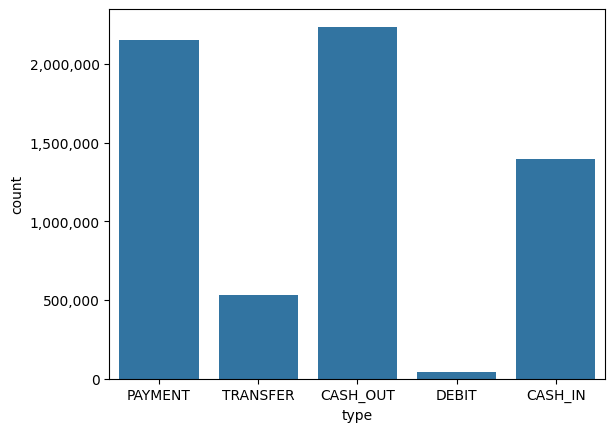

In [5]:
type_counts = dataFreud['type'].value_counts()
ax = sns.countplot(x ='type',data=dataFreud)
dataFreud['type'].value_counts()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.gcf().text(0.75, 0.6, legend_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.gcf().text(0.75, 0.6, legend_text, fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{(y/total)*100:.1f}%'))

The counts of the methods of transactions is visualised. the lowest is from debit type and both payment and cash types have the highest.

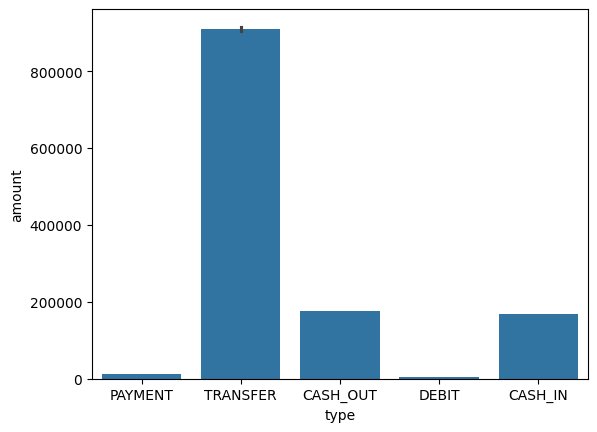

In [6]:
sns.barplot(x ='type',y='amount',data=dataFreud)
plt.show()

the amount transacted is shown here according to each type of transaction. Online transfer is the method with the highest amount of transactions while lowest from debit.

In [7]:
print(dataFreud['isFraud'].dtype)

int64


In [6]:
countsFreud = dataFreud['isFraud'].value_counts()
print("Counts:\n", countsFreud)
percentagesFreud = dataFreud['isFraud'].value_counts(normalize=True) * 100
print("Percentages:\n", percentagesFreud.round(2))

Counts:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64
Percentages:
 isFraud
0    99.87
1     0.13
Name: proportion, dtype: float64


in the data set 6354407 not fraud transactions happenned and only 8213, 0.13% of fraud transactions occured. There is a huge imbalance problem in the data set.

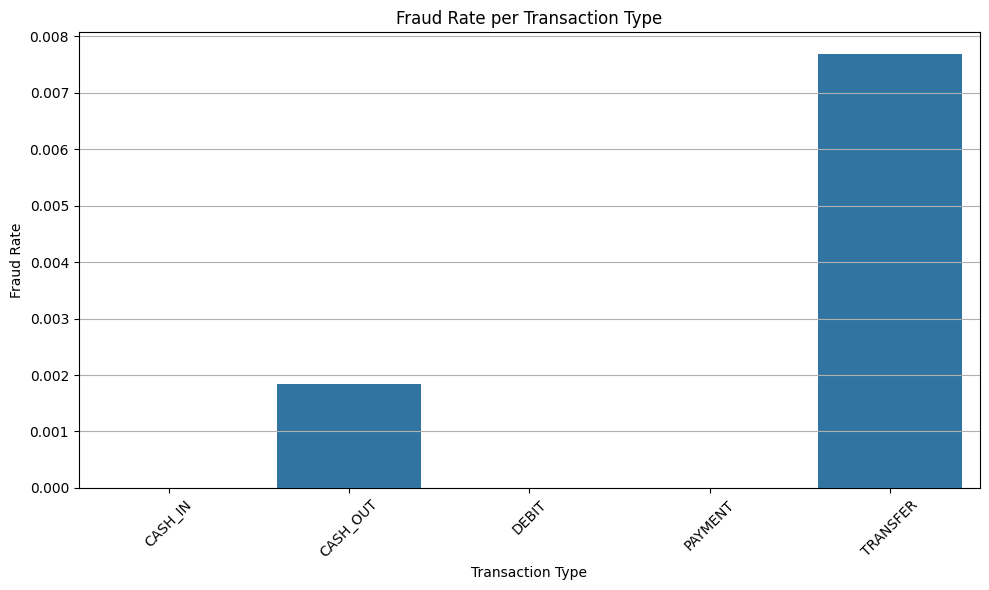

In [7]:
type_fraud_rate = dataFreud.groupby('type')['isFraud'].mean().reset_index()


type_counts = dataFreud['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']


type_fraud_rate = type_fraud_rate.merge(type_counts, on='type')


plt.figure(figsize=(10, 6))
sns.barplot(data=type_fraud_rate, x='type', y='isFraud')
plt.title("Fraud Rate per Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Fraud transactions were only happened in cash and transfer methods.

In [7]:
fraud_counts = dataFreud.groupby('type')['isFraud'].value_counts().unstack().fillna(0).astype(int)
fraud_counts.columns = ['Non-Fraud (0)', 'Fraud (1)']
print(fraud_counts)

          Non-Fraud (0)  Fraud (1)
type                              
CASH_IN         1399284          0
CASH_OUT        2233384       4116
DEBIT             41432          0
PAYMENT         2151495          0
TRANSFER         528812       4097


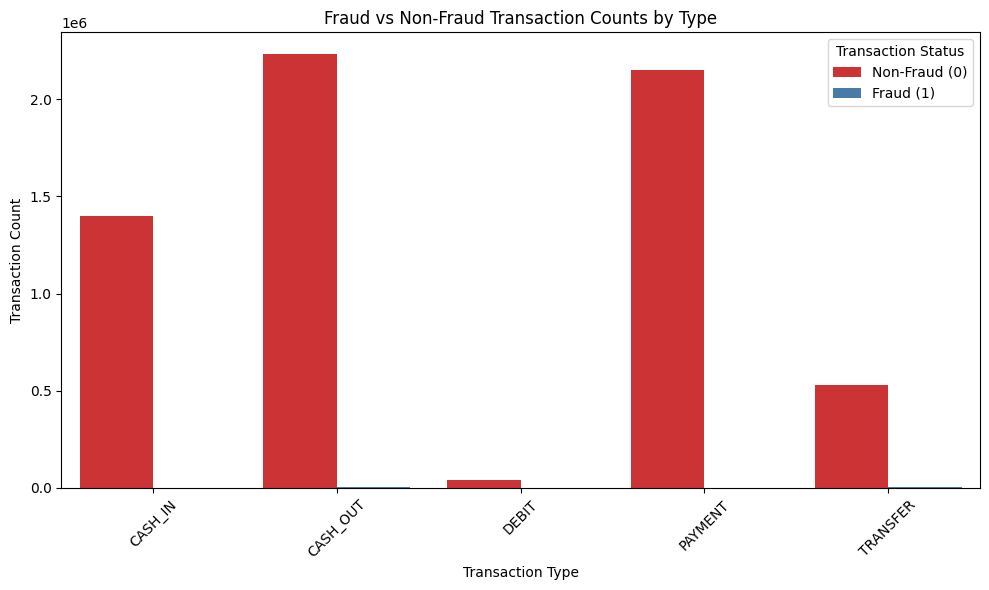

In [9]:

fraud_counts = dataFreud.groupby('type')['isFraud'].value_counts().unstack().fillna(0).astype(int)
fraud_counts.columns = ['Non-Fraud (0)', 'Fraud (1)']
fraud_counts_plot = fraud_counts.reset_index()


fraud_counts_long = fraud_counts_plot.melt(id_vars='type',
                                            value_vars=['Non-Fraud (0)', 'Fraud (1)'],
                                            var_name='Fraud Status',
                                            value_name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts_long, x='type', y='Count', hue='Fraud Status', palette='Set1')
plt.title("Fraud vs Non-Fraud Transaction Counts by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Transaction Status")
plt.tight_layout()
plt.show()

In [10]:

dataFraudDrop = dataFreud.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])
print(dataFraudDrop)
names=dataFraudDrop.columns
print(names)

         step      type      amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64      170136.00       160296.36   
1           1   PAYMENT     1864.28       21249.00        19384.72   
2           1  TRANSFER      181.00         181.00            0.00   
3           1  CASH_OUT      181.00         181.00            0.00   
4           1   PAYMENT    11668.14       41554.00        29885.86   
...       ...       ...         ...            ...             ...   
6362615   743  CASH_OUT   339682.13      339682.13            0.00   
6362616   743  TRANSFER  6311409.28     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00   
6362618   743  TRANSFER   850002.52      850002.52            0.00   
6362619   743  CASH_OUT   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  
0                  0.00            0.00        0  
1                  0.00            0.00        0  
2     

Not wanted feautures are removed.

In [11]:

trainingSet, testingSet = train_test_split(dataFraudDrop, test_size=0.3, random_state=42,stratify=dataFraudDrop['isFraud'])
countsFreudDropTrain = trainingSet['isFraud'].value_counts()
print("Counts:\n", countsFreudDropTrain)
percentagesFreudTrain= trainingSet['isFraud'].value_counts(normalize=True) * 100
print("Percentages:\n", percentagesFreudTrain.round(2))

countsFreudDropTest= testingSet['isFraud'].value_counts()
print("Counts:\n", countsFreudDropTest)
percentagesFreudTest= testingSet['isFraud'].value_counts(normalize=True) * 100
print("Percentages:\n", percentagesFreudTest.round(2))

Counts:
 isFraud
0    4448085
1       5749
Name: count, dtype: int64
Percentages:
 isFraud
0    99.87
1     0.13
Name: proportion, dtype: float64
Counts:
 isFraud
0    1906322
1       2464
Name: count, dtype: int64
Percentages:
 isFraud
0    99.87
1     0.13
Name: proportion, dtype: float64


In [12]:

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = dataFraudDrop[features]
Y = dataFraudDrop['isFraud']
print(X)
print(Y)



             type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         PAYMENT     9839.64      170136.00       160296.36            0.00   
1         PAYMENT     1864.28       21249.00        19384.72            0.00   
2        TRANSFER      181.00         181.00            0.00            0.00   
3        CASH_OUT      181.00         181.00            0.00        21182.00   
4         PAYMENT    11668.14       41554.00        29885.86            0.00   
...           ...         ...            ...             ...             ...   
6362615  CASH_OUT   339682.13      339682.13            0.00            0.00   
6362616  TRANSFER  6311409.28     6311409.28            0.00            0.00   
6362617  CASH_OUT  6311409.28     6311409.28            0.00        68488.84   
6362618  TRANSFER   850002.52      850002.52            0.00            0.00   
6362619  CASH_OUT   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  
0            

In [13]:

categorical = ['type']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

preprocessor = ColumnTransformer([


    ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical),
    ('num', 'passthrough', numerical)
])


model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y, random_state=42
)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[1809770   96552]
 [    176    2288]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



This code builds a logistic regression classification model using a pipeline that includes preprocessing for both categorical and numerical features. The 'type' column is one-hot encoded (dropping the first category), while numerical features are passed through unchanged. The dataset is split into training and test sets with the same class proportions using stratified sampling. The logistic regression model is trained with class_weight='balanced' to handle class imbalance. Finally, the model’s performance is evaluated using a confusion matrix and a classification report.
a very low precision score for frauds is a concern. a high recall value is obtained for recall.

In [14]:
model2 = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred2))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred2))



Confusion Matrix:
 [[1906200     122]
 [   1362    1102]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.90      0.45      0.60      2464

    accuracy                           1.00   1908786
   macro avg       0.95      0.72      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



logistic regression model is trained without class weighting, relying only on the natural data distribution. when non weighted logit model is fitted, precision of frauds increased by almost 0.9 compared to preveous model but recall is dropped.

In [15]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC



In [15]:
manual_weights = {0: 1, 1: 10}
svmModel = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('svm', LinearSVC(class_weight=manual_weights, max_iter=10000))
])


In [16]:
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Confusion Matrix:
 [[1905613     709]
 [   1213    1251]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.64      0.51      0.57      2464

    accuracy                           1.00   1908786
   macro avg       0.82      0.75      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



For the minority class (1), the precision is 0.64, recall is 0.51, and F1-score is 0.57, indicating that the model struggles to correctly identify all fraudulent or minority cases.

In [17]:
from sklearn.model_selection import GridSearchCV

In [2]:
RFmodel = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

NameError: name 'Pipeline' is not defined

In [18]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.3 MB/s eta 0:00:00


In [29]:
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])


    model = Pipeline([
        ('preprocess', preprocessor),
        ('rf', RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features
        ))
        ])
    score = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1', n_jobs=-1).mean()
    return score

In [33]:
from sklearn.model_selection import cross_val_score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=4)

[I 2025-08-03 13:58:37,424] A new study created in memory with name: no-name-a17d9429-5eab-4e94-98db-eea20a66c046
[I 2025-08-03 14:17:57,625] Trial 0 finished with value: 0.15020205477325096 and parameters: {'n_estimators': 68, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.15020205477325096.
[W 2025-08-03 14:18:04,473] Trial 1 failed with parameters: {'n_estimators': 284, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'auto'} because of the following error: ValueError('\nAll the 3 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n3 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selecti

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [34]:
print("Best Trial:")
print("  F1 Score: ", study.best_value)
print("  Params: ", study.best_params)

Best Trial:
  F1 Score:  0.15020205477325096
  Params:  {'n_estimators': 68, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}


In [1]:

from sklearn.model_selection import cross_val_score

def objective(trial):
    svc = SVC(
        C=trial.suggest_loguniform('C', 1e-3, 1e3),
        gamma=trial.suggest_loguniform('gamma', 1e-4, 1e1),
        kernel=trial.suggest_categorical('kernel', ['rbf', 'poly'])
    )
    return cross_val_score(svc, X_train, y_train, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

NameError: name 'optuna' is not defined

In [16]:
pip install xgboost

In [18]:
from xgboost import XGBClassifier

In [19]:
neg, pos = np.bincount(Y_train)
scale_pos_weight = neg / pos

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    ))
])


xgb_pipeline.fit(X_train, Y_train)

Y_pred_xgb = xgb_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:11:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xgb))

Confusion Matrix:
 [[1895340   10982]
 [     16    2448]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.18      0.99      0.31      2464

    accuracy                           0.99   1908786
   macro avg       0.59      0.99      0.65   1908786
weighted avg       1.00      0.99      1.00   1908786



The XGBoost classifier was trained on an imbalanced dataset using a preprocessing pipeline to encode categorical features and pass numerical ones. The model incorporated scale_pos_weight to address the class imbalance effectively.

On the test set, the model achieved a high overall accuracy of 99%. The confusion matrix shows that the vast majority of negative cases (non-events) were correctly classified, with only a small number of false positives.

For the minority positive class, the model achieved a recall of 99%, meaning it successfully identified almost all true positive cases. However, precision for this class is low (18%), indicating some false positives among the predicted positives. This resulted in an F1-score of 0.31 for the positive class.

Overall, the model is highly effective at detecting positive cases (high recall), which is critical in imbalanced scenarios where missing positives can be costly. The tradeoff is a higher false positive rate, reflected in lower precision, which may require further tuning depending on the application needs.